In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

c:\Users\admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold, StratifiedGroupKFold, LeaveOneOut, ShuffleSplit, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score

In [4]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
iris = load_iris(as_frame=True)

In [6]:
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [7]:
scores = cross_validate(logreg, iris['data'], iris['target'], cv=5, return_train_score=True)
scores

{'fit_time': array([0.0170145 , 0.02101922, 0.01901698, 0.0190177 , 0.01801586]),
 'score_time': array([0.00100088, 0.00100088, 0.00100112, 0.00100088, 0.0010016 ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [8]:
scores_df = pd.DataFrame(scores)
scores_df

,fit_time,score_time,test_score,train_score
0,0.017015,0.001001,0.966667,0.966667
1,0.021019,0.001001,1.000000,0.966667
2,0.019017,0.001001,0.933333,0.983333
3,0.019018,0.001001,0.966667,0.983333
4,0.018016,0.001002,1.000000,0.975000


In [9]:
shuffle_split = ShuffleSplit(train_size=0.5, test_size=0.3, n_splits=10)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=shuffle_split)
scores

array([1.        , 0.95555556, 0.95555556, 0.95555556, 0.97777778,
       0.97777778, 0.95555556, 0.97777778, 0.95555556, 1.        ])

In [10]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

In [11]:
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
scores

array([0.75      , 0.6       , 0.66666667])

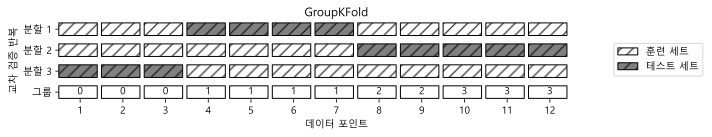

In [12]:
mglearn.plots.plot_group_kfold()

In [13]:
iris = load_iris(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

In [14]:
param_grid = {'C':np.logspace(-3, 2, 6), 'gamma':np.logspace(-3, 2, 6)}

In [15]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             return_train_score=True)

In [16]:
# score() 메서드는 테스트 세트로 계산하는 일반화 성능, best_score_ 속성은 최상의 교차검증 평균 정확도
grid.score(X_test, y_test), grid.best_params_, grid.best_estimator_, grid.best_score_

(0.9736842105263158,
 {'C': 10.0, 'gamma': 0.1},
 SVC(C=10.0, gamma=0.1),
 0.9731225296442687)

In [17]:
# 평균점수가 같은 파라미터의 조합이 있을 경우 표준편차가 작은 파라미터 조합이 더 좋다고 판단
results = pd.DataFrame(grid.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.002802,0.003003,0.002602,0.002602,0.002002,0.002402,0.002402,0.002402,0.002202,0.002202,...,0.001401,0.001401,0.002202,0.002602,0.001802,0.001602,0.001802,0.001201,0.002602,0.002202
std_fit_time,0.000401,0.0,0.00049,0.000801,0.000633,0.000491,0.000801,0.00049,0.000402,0.0004,...,0.00049,0.000491,0.0004,0.00049,0.000401,0.00049,0.000401,0.0004,0.00049,0.0004
mean_score_time,0.001401,0.001602,0.001401,0.001802,0.001402,0.001601,0.001201,0.001801,0.001602,0.001401,...,0.001001,0.001201,0.001401,0.001401,0.000801,0.001001,0.001001,0.001802,0.001401,0.001201
std_score_time,0.00049,0.00049,0.00049,0.0004,0.00049,0.00049,0.0004,0.0004,0.000491,0.00049,...,0.0,0.0004,0.00049,0.000491,0.0004,0.0,0.0,0.0004,0.00049,0.0004
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,10.0,10.0,10.0,10.0,100.0,100.0,100.0,100.0,100.0,100.0
param_gamma,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,...,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1.0}","{'C': 0.001, 'gamma': 10.0}","{'C': 0.001, 'gamma': 100.0}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1.0}",...,"{'C': 10.0, 'gamma': 0.1}","{'C': 10.0, 'gamma': 1.0}","{'C': 10.0, 'gamma': 10.0}","{'C': 10.0, 'gamma': 100.0}","{'C': 100.0, 'gamma': 0.001}","{'C': 100.0, 'gamma': 0.01}","{'C': 100.0, 'gamma': 0.1}","{'C': 100.0, 'gamma': 1.0}","{'C': 100.0, 'gamma': 10.0}","{'C': 100.0, 'gamma': 100.0}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,1.0,1.0,1.0,0.956522,0.869565,0.521739
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.956522,0.913043,0.956522,0.956522,0.913043,0.521739
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,...,1.0,1.0,1.0,0.590909,1.0,1.0,1.0,1.0,1.0,0.590909


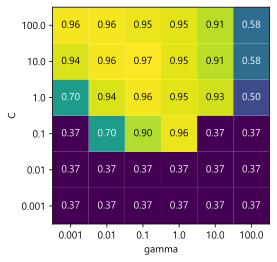

In [18]:
scores = results.loc[:, 'mean_test_score'].values.astype('float64').reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])

In [19]:
# SVC에서 kernel 파라미터는 리스트 안에 들어가야
param_grid = [{'kernel':['rbf'], 'C':np.logspace(-3, 2, 6), 'gamma':np.logspace(-3, 2, 6)},
{'kernel':['linear'], 'C':np.logspace(-3, 2, 6)}]

In [20]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['rbf']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['linear']}],
             return_train_score=True)

In [21]:
grid.score(X_test, y_test), grid.best_params_, grid.best_estimator_, grid.best_score_

(0.9736842105263158,
 {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'},
 SVC(C=10.0, gamma=0.1),
 0.9731225296442687)

In [22]:
results = pd.DataFrame(grid.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.001801,0.002402,0.001802,0.001801,0.002202,0.002002,0.002202,0.002002,0.002002,0.002202,...,0.001802,0.002002,0.001801,0.002402,0.001401,0.001802,0.001001,0.001201,0.001201,0.001201
std_fit_time,0.000401,0.00049,0.0004,0.000401,0.0004,0.0,0.0004,0.0,0.000633,0.0004,...,0.001167,0.0,0.0004,0.00049,0.00049,0.000401,0.0,0.000401,0.0004,0.000401
mean_score_time,0.001802,0.001201,0.001201,0.001001,0.001602,0.001602,0.001201,0.001601,0.001402,0.001001,...,0.001201,0.000801,0.001201,0.001001,0.001001,0.000801,0.001001,0.000801,0.000801,0.000801
std_score_time,0.0004,0.0004,0.000401,0.0,0.00049,0.000491,0.0004,0.000491,0.000491,0.000001,...,0.0004,0.0004,0.0004,0.0,0.0,0.0004,0.0,0.0004,0.0004,0.0004
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100.0,100.0,100.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0
param_gamma,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,...,0.1,1.0,10.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1.0, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10.0, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100.0, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1.0, 'kernel': 'rbf'}",...,"{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}","{'C': 100.0, 'gamma': 10.0, 'kernel': 'rbf'}","{'C': 100.0, 'gamma': 100.0, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1.0, 'kernel': 'linear'}","{'C': 10.0, 'kernel': 'linear'}","{'C': 100.0, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [23]:
param_dist = [{'kernel':['rbf'], 'C':ss.loguniform(0.001, 100), 'gamma':ss.loguniform(0.001, 100)},
{'kernel':['linear'], 'C':ss.loguniform(0.001, 100)}]

In [24]:
rand = RandomizedSearchCV(SVC(), param_distributions=param_dist, cv=5, n_iter=20, return_train_score=True, n_jobs=-1)
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028A235B3E20>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028A236B63A0>,
                                         'kernel': ['rbf']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028A235B8D00>,
                                         'kernel': ['linear']}],
                   return_train_score=True)

In [25]:
rand.score(X_test, y_test), rand.best_params_, rand.best_estimator_, rand.best_score_

(0.9736842105263158,
 {'C': 6.690392158502634, 'kernel': 'linear'},
 SVC(C=6.690392158502634, kernel='linear'),
 0.9727272727272727)

In [26]:
digits = load_digits()
X = digits['data']
y = digits['target'] == 9
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
dummy_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_major.score(X_test, y_test)

0.8955555555555555

In [28]:
rand_sample = RandomUnderSampler(sampling_strategy='majority', random_state=0)
X_re, y_re = rand_sample.fit_resample(X, y)
X.shape, y.shape, X_re.shape, y_re.shape

((1797, 64), (1797,), (360, 64), (360,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_re, y_re, random_state=0)
dummy_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_major.score(X_test, y_test)

0.4666666666666667

In [30]:
rand_sample = SMOTE(sampling_strategy='minority', random_state=0)
X_re, y_re = rand_sample.fit_resample(X, y)
X.shape, y.shape, X_re.shape, y_re.shape

((1797, 64), (1797,), (3234, 64), (3234,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_re, y_re, random_state=0)
dummy_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_major.score(X_test, y_test)

0.4919653893695921

In [32]:
digits = load_digits()
X = digits['data']
y = digits['target'] == 9
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [34]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[402,   1],
       [  6,  41]], dtype=int64)

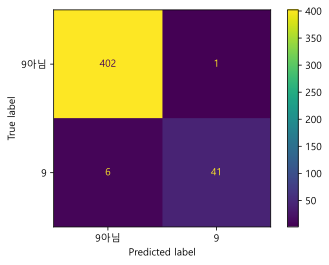

In [35]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['9아님', '9'])

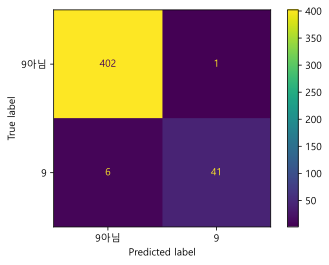

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['9아님', '9'])

In [37]:
f1_score(y_test, y_pred)

0.9213483146067415

In [38]:
# 각 클래스가 양성일 때 정밀도, 재현율, f1_score 표시
# macro avg, weighted avg는 두 클래스가 각각 양성일 때의 평균
print(classification_report(y_test, y_pred, target_names=['9아님', '9'], zero_division=0))

              precision    recall  f1-score   support

         9아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [39]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
svm_clf = SVC(gamma=0.05, probability=True).fit(X_train, y_train)
# 분류기는 소수인 클래스 1보다 클래스 0에 초점을 맞추고 있는 상태
print(classification_report(y_test, svm_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [41]:
# 잘못된 방식 → 임계값을 선택할 때 테스트 세트를 사용하면 안됨
y_pred_lower_threshold = svm_clf.decision_function(X_test) > -0.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [42]:
precision, recall, thrs = precision_recall_curve(y_test, svm_clf.decision_function(X_test))
precision, recall, thrs

(array([0.32142857, 0.2962963 , 0.30769231, 0.32      , 0.33333333,
        0.34782609, 0.36363636, 0.38095238, 0.4       , 0.36842105,
        0.33333333, 0.35294118, 0.375     , 0.4       , 0.42857143,
        0.38461538, 0.41666667, 0.45454545, 0.4       , 0.44444444,
        0.5       , 0.57142857, 0.66666667, 0.6       , 0.5       ,
        0.66666667, 0.5       , 1.        , 1.        ]),
 array([1.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
        0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.77777778,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.55555556, 0.55555556, 0.55555556, 0.44444444, 0.44444444,
        0.44444444, 0.44444444, 0.44444444, 0.33333333, 0.22222222,
        0.22222222, 0.11111111, 0.11111111, 0.        ]),
 array([-0.7512563 , -0.58749402, -0.48739733, -0.44364565, -0.40435353,
        -0.28965335, -0.24173165, -0.19257469, -0.17852475, -0.16644845,
        -0.1601932 ,  0.08620484,  0.14630375,  0.19153373

In [43]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X.shape, y.shape

((4500, 2), (4500,))

In [44]:
svm_clf = SVC(gamma=0.05, probability=True).fit(X_train, y_train)
print(classification_report(y_test, svm_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1004
           1       0.64      0.67      0.66       121

    accuracy                           0.92      1125
   macro avg       0.80      0.81      0.81      1125
weighted avg       0.93      0.92      0.93      1125



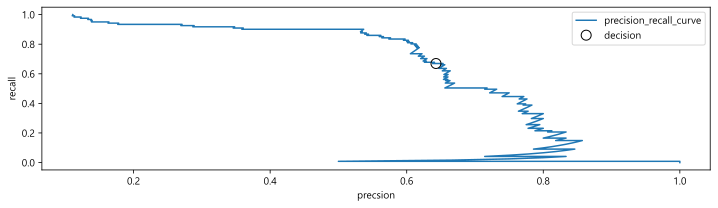

In [45]:
precision, recall, thrs = precision_recall_curve(y_test, svm_clf.decision_function(X_test))
close_zero = np.argmin(np.abs(thrs))
plt.figure(figsize=(12, 3))
plt.plot(precision, recall, label='precision_recall_curve')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='decision', fillstyle='none', c='black')
plt.xlabel('precsion')
plt.ylabel('recall')
plt.legend()
plt.show()

In [46]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features=2, random_state=0).fit(X_train, y_train)

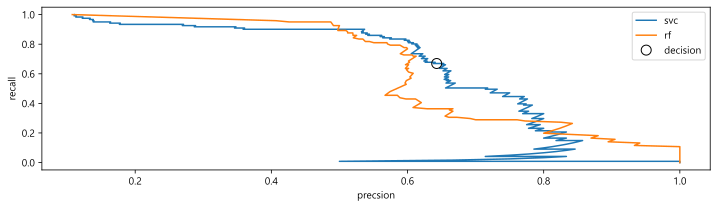

In [49]:
precision, recall, thrs = precision_recall_curve(y_test, svm_clf.decision_function(X_test))
precision_rf, recall_rf, thrs_rf = precision_recall_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
close_zero_svc = np.argmin(np.abs(thrs))
# thrs_rf의 shape가 제대로 안나오는데..?
close_zero_rf = np.argmin(np.abs(thrs_rf - 0.5))
plt.figure(figsize=(12, 3))
plt.plot(precision, recall, label='svc')
plt.plot(precision_rf, recall_rf, label='rf')
plt.plot(precision[close_zero_svc], recall[close_zero_svc], 'o', markersize=10, label='decision', fillstyle='none', c='black')
#plt.plot(precision[close_zero_rf], recall[close_zero_rf], '^', markersize=10, label='decision', fillstyle='none', c='black')
plt.xlabel('precsion')
plt.ylabel('recall')
plt.legend()
plt.show()

In [51]:
# average_precsion_score는 precision_recall_curve의 아래 면적을 반환
ap_rf = average_precision_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svm_clf.decision_function(X_test))
ap_rf, ap_svc

(0.659559370099291, 0.6663140319391998)

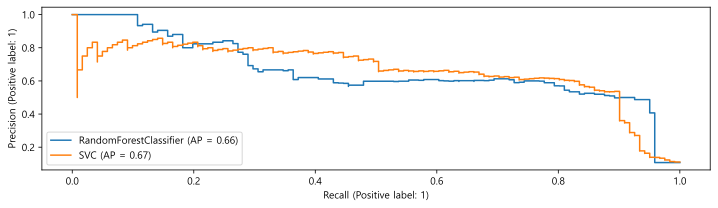

In [54]:
fig, ax = plt.subplots(figsize=(12, 3))
PrecisionRecallDisplay.from_estimator(rf_clf, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(svm_clf, X_test, y_test, ax=ax)